In [9]:
#   Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import torch
import timm
from torch.utils.data import Dataset, DataLoader, Subset, random_split
from torch import nn
from torchvision import transforms, utils, datasets, models
from torchvision.io import read_image
from PIL import Image
import scipy.io as sio
from ignite.metrics import MultiLabelConfusionMatrix
from sklearn.metrics import multilabel_confusion_matrix
import math


In [10]:
#   Variables
epochs = 10
batch_size = 32
device = ("cuda" if torch.cuda.is_available() else "cpu") # Use GPU or CPU for training

In [11]:
#   Read in pretrained model
#   The workflow here:
#       define a model of the trained class:
#       load from the file
#       

#   Define the model of the trained class
class MultilabelClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = models.resnet50(pretrained=True)
        self.model_wo_fc = nn.Sequential(*list(self.model.children())[:-1])

        self.five_oclock_shadow = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.arched_eyebrows = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.attractive = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.bags_under_eyes = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.bald = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.bangs = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.big_lips = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.big_nose = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.black_hair = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.blond_hair = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.blurry = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.brown_hair = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.bushy_eyebrows = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.chubby = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.double_chin = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.eyeglasses = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.goatee = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.gray_hair = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.heavy_makeup = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.high_cheekbones = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.male = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.mouth_slightly_open = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.mustache = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.narrow_eyes = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.no_beard = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.oval_face = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.pale_skin = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.pointy_nose = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.receding_hairline = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.rosy_cheeks = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.sideburns = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.smiling = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.straight_hair = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.wavy_hair = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.wearing_earrings = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.wearing_hat = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.wearing_lipstick = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.wearing_necklace = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.wearing_necktie = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.young = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )


        
    def forward(self, x):
        x = self.model_wo_fc(x)
        x = torch.flatten(x, 1)

        return [
            self.five_oclock_shadow(x),
            self.arched_eyebrows(x),
            self.attractive(x),
            self.bags_under_eyes(x),
            self.bald(x),
            self.bangs(x),
            self.big_lips(x),
            self.big_nose(x),
            self.black_hair(x),
            self.blond_hair(x),
            self.blurry(x),
            self.brown_hair(x),
            self.bushy_eyebrows(x),
            self.chubby(x),
            self.double_chin(x),
            self.eyeglasses(x),
            self.goatee(x),
            self.gray_hair(x),
            self.heavy_makeup(x),
            self.high_cheekbones(x),
            self.male(x),
            self.mouth_slightly_open(x),
            self.mustache(x),
            self.narrow_eyes(x),
            self.no_beard(x),
            self.oval_face(x),
            self.pale_skin(x),
            self.pointy_nose(x),
            self.receding_hairline(x),
            self.rosy_cheeks(x),
            self.sideburns(x),
            self.smiling(x),
            self.straight_hair(x),
            self.wavy_hair(x),
            self.wearing_earrings(x),
            self.wearing_hat(x),
            self.wearing_lipstick(x),
            self.wearing_necklace(x),
            self.wearing_necktie(x),
            self.young(x)
        ]

In [12]:
# Create the new model
class CaricatureClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        #self.model = MultilabelClassifier()
        self.model = models.resnet50(pretrained=True)
        self.model_wo_fc = nn.Sequential(*list(self.model.children())[:-1])

        self.cheekbones = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.cheeks = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.chin = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.ears = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.eyebrows = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.eyelids = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.eyes = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.facial_hair = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.forehead = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.hair = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.head = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.lips = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.mouth = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.neck = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.nose = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.skin = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.teeth = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
        self.upper_lip = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.model_wo_fc(x)
        x = torch.flatten(x, 1)

        return [
            self.cheekbones(x),
            self.cheeks(x),
            self.chin(x),
            self.ears(x),
            self.eyebrows(x),
            self.eyelids(x),
            self.eyes(x),
            self.facial_hair(x),
            self.forehead(x),
            self.hair(x),
            self.head(x),
            self.lips(x),
            self.mouth(x),
            self.neck(x),
            self.nose(x),
            self.skin(x),
            self.teeth(x),
            self.upper_lip(x)
        ]

In [13]:
#BAGS OF IMAGES
import cv2
root_dir = 'C:\\Users\\Jayam\\OneDrive\\Desktop\\School Work\\Grad school\\Research Work\\for Jay\\ourcar\\'
labels = np.loadtxt('binary_labels.txt', dtype=str)
bags = []
for idx, label in enumerate(labels):
    img_person = os.path.join(root_dir, label[0])
    person_image = []
    for filename in os.listdir(img_person):
        img = cv2.imread(os.path.join(img_person, filename))
        person_image.append(img)
    bag = label, person_image
    bags.append(bag)
    


In [14]:
#Display Image
cv2.imshow('image', bags[0][1][0])
cv2.waitKey(0)

-1

In [15]:
#   Create Dataloader
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
'''
class CaricatureDataset(Dataset):
    def __init__(self, labels_file, root_dir, transform=None):
        self.labels = pd.read_csv(labels_file)
        self.root_dir = root_dir
        self.list_IDs = os.listdir(root_dir)
        self.data = []
        for id in self.list_IDs:
            temp_data = [id]
            for image in os.listdir(os.path.join(root_dir, id)):
                temp_data.append(image)
            self.data.append(temp_data)
        self.transform = transform
    
    def __len__(self):
        return len(self.list_IDs)
    
    def __getitem__(self, idx):
        class_name, images = self.labels[idx][0], self.data[idx]
        for index, image in enumerate(images):
            if self.transform:
                images[index] = self.transform(image)
        labels = self.labels.iloc[idx, 1:].values.astype('float32')
        return images, labels
'''
class CaricatureDataset(Dataset):
    def __init__(self, labels_file, root_dir, transform=None):
        self.labels = pd.read_csv(labels_file)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        # This will read the first 5 images per person, this can probably be tweaked to include all images
        class_index = math.floor(idx/5)
        image_num = idx%5
        img_person = os.path.join(self.root_dir, self.labels.iloc[class_index, 0].strip())
        labels = self.labels.iloc[class_index, 1].replace('[', '').replace(']', '').split('.')[:-1]
        labels = np.array([int(label) for label in labels])
        img = read_image(os.path.join(img_person, os.listdir(img_person)[image_num]))
        if img.shape[0] == 1:
            img = np.repeat(img, 3, axis=0)
        sample = img, labels
        return sample

In [16]:
#   Load the data
dataset = CaricatureDataset(labels_file='binary_labels.txt', root_dir='C:\\Users\\Jayam\\OneDrive\\Desktop\\School Work\\Grad school\\Research Work\\for Jay\\ourcar\\', transform=transform)
#   Split the data into train and test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
#   Create the dataloaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)


In [17]:
def criterion2 (loss_func, pred, target):
    labels = target.type(torch.FloatTensor).to(device)
    pred = pred.squeeze(2)
    loss = loss_func(pred, target)
    return loss

def training(model, device, lr, epochs, train_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion  = nn.BCELoss()
    accurate_predictions = 0
    total_predictions = 0
    model.train()
    all_true_labels = np.array([])
    all_pred_labels = np.array([])
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            data = data.float()
            target = target.float()
            optimizer.zero_grad()
            output = model(data)
            output = torch.stack(output, dim=1)
            predictions = np.round(output.detach().cpu().numpy()).flatten()
            labels = target.detach().cpu().numpy().flatten()
            all_true_labels = np.concatenate((all_true_labels, labels))
            all_pred_labels = np.concatenate((all_pred_labels, predictions))
            output = output.squeeze(2)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            for index, prediction in enumerate(predictions):
                if prediction == labels[index]:
                    accurate_predictions += 1
                total_predictions += 1
            #print('Predictions for ', str(batch_idx), ': ', predictions)
            #print('Labels for ', str(batch_idx), ': ', labels)
            if batch_idx % 10 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {:.2f}'.format(
                    epoch, batch_idx * len(train_loader), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item(), accurate_predictions/total_predictions))
                accurate_predictions = 0
                total_predictions = 0
    torch.save(model.state_dict(), 'model.pt')

def testing(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    all_true_labels = np.array([])
    all_predictions = np.array([])
    all_true_labels_itemized = np.zeros([1,18])
    all_predictions_itemized = np.zeros([1,18])
    with torch.no_grad():
        print(len(test_loader))
        for data, target in test_loader:
            data, target = data.to(device).float(), target.to(device).float()
            output = model(data)
            outputs = torch.stack(output, dim=1)
            predictions = np.round(outputs.detach().cpu().numpy())
            labels = target.detach().cpu().numpy()
            all_true_labels = np.append(all_true_labels, labels)
            all_predictions = np.append(all_predictions, predictions)
            predictions = predictions.transpose()
            all_true_labels_itemized = np.concatenate((all_true_labels_itemized, labels), axis=0)
            all_predictions_itemized = np.concatenate((all_predictions_itemized, predictions[0].T), axis=0)
    for index, prediction in enumerate(all_predictions):
        if prediction == all_true_labels[index]:
            correct += 1
    print('Accuracy: ', correct/len(all_predictions))
    print('Confusion Matrix: ', multilabel_confusion_matrix(all_true_labels, all_predictions))
    return all_true_labels_itemized, all_predictions_itemized




In [18]:
model = CaricatureClassifier().to(device)
test = training(model, device, 0.001, 80, train_loader)

C:\Users\Jayam\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Jayam\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Train Epoch: 0 [0/162 (0%)]	Loss: 0.705371	Accuracy: 0.49
Train Epoch: 0 [410/162 (24%)]	Loss: 0.601151	Accuracy: 0.73
Train Epoch: 0 [820/162 (49%)]	Loss: 0.533870	Accuracy: 0.73
Train Epoch: 0 [1230/162 (73%)]	Loss: 0.482115	Accuracy: 0.71
Train Epoch: 0 [1640/162 (98%)]	Loss: 0.636430	Accuracy: 0.77
Train Epoch: 1 [0/162 (0%)]	Loss: 0.452784	Accuracy: 0.81
Train Epoch: 1 [410/162 (24%)]	Loss: 0.530200	Accuracy: 0.74
Train Epoch: 1 [820/162 (49%)]	Loss: 0.509684	Accuracy: 0.71
Train Epoch: 1 [1230/162 (73%)]	Loss: 0.578464	Accuracy: 0.73
Train Epoch: 1 [1640/162 (98%)]	Loss: 0.534911	Accuracy: 0.76
Train Epoch: 2 [0/162 (0%)]	Loss: 0.609567	Accuracy: 0.65
Train Epoch: 2 [410/162 (24%)]	Loss: 0.506881	Accuracy: 0.74
Train Epoch: 2 [820/162 (49%)]	Loss: 0.515235	Accuracy: 0.71
Train Epoch: 2 [1230/162 (73%)]	Loss: 0.499247	Accuracy: 0.76
Train Epoch: 2 [1640/162 (98%)]	Loss: 0.557467	Accuracy: 0.77
Train Epoch: 3 [0/162 (0%)]	Loss: 0.499056	Accuracy: 0.75
Train Epoch: 3 [410/162 (24%)]

Train Epoch: 26 [1640/162 (98%)]	Loss: 0.418972	Accuracy: 0.85
Train Epoch: 27 [0/162 (0%)]	Loss: 0.267581	Accuracy: 0.88
Train Epoch: 27 [410/162 (24%)]	Loss: 0.334170	Accuracy: 0.85
Train Epoch: 27 [820/162 (49%)]	Loss: 0.249401	Accuracy: 0.83
Train Epoch: 27 [1230/162 (73%)]	Loss: 0.342274	Accuracy: 0.86
Train Epoch: 27 [1640/162 (98%)]	Loss: 0.293793	Accuracy: 0.85
Train Epoch: 28 [0/162 (0%)]	Loss: 0.313070	Accuracy: 0.90
Train Epoch: 28 [410/162 (24%)]	Loss: 0.312901	Accuracy: 0.90
Train Epoch: 28 [820/162 (49%)]	Loss: 0.361177	Accuracy: 0.87
Train Epoch: 28 [1230/162 (73%)]	Loss: 0.344273	Accuracy: 0.84
Train Epoch: 28 [1640/162 (98%)]	Loss: 0.374868	Accuracy: 0.85
Train Epoch: 29 [0/162 (0%)]	Loss: 0.310927	Accuracy: 0.85
Train Epoch: 29 [410/162 (24%)]	Loss: 0.314239	Accuracy: 0.88
Train Epoch: 29 [820/162 (49%)]	Loss: 0.300781	Accuracy: 0.90
Train Epoch: 29 [1230/162 (73%)]	Loss: 0.251862	Accuracy: 0.88
Train Epoch: 29 [1640/162 (98%)]	Loss: 0.143870	Accuracy: 0.89
Train Epoc

Train Epoch: 53 [820/162 (49%)]	Loss: 0.032643	Accuracy: 0.98
Train Epoch: 53 [1230/162 (73%)]	Loss: 0.016576	Accuracy: 0.98
Train Epoch: 53 [1640/162 (98%)]	Loss: 0.101001	Accuracy: 0.99
Train Epoch: 54 [0/162 (0%)]	Loss: 0.015546	Accuracy: 1.00
Train Epoch: 54 [410/162 (24%)]	Loss: 0.016579	Accuracy: 0.99
Train Epoch: 54 [820/162 (49%)]	Loss: 0.063309	Accuracy: 0.99
Train Epoch: 54 [1230/162 (73%)]	Loss: 0.080443	Accuracy: 0.99
Train Epoch: 54 [1640/162 (98%)]	Loss: 0.038780	Accuracy: 0.98
Train Epoch: 55 [0/162 (0%)]	Loss: 0.022156	Accuracy: 1.00
Train Epoch: 55 [410/162 (24%)]	Loss: 0.017497	Accuracy: 0.99
Train Epoch: 55 [820/162 (49%)]	Loss: 0.011963	Accuracy: 0.99
Train Epoch: 55 [1230/162 (73%)]	Loss: 0.013393	Accuracy: 0.99
Train Epoch: 55 [1640/162 (98%)]	Loss: 0.023033	Accuracy: 0.99
Train Epoch: 56 [0/162 (0%)]	Loss: 0.060587	Accuracy: 0.96
Train Epoch: 56 [410/162 (24%)]	Loss: 0.019168	Accuracy: 0.99
Train Epoch: 56 [820/162 (49%)]	Loss: 0.076593	Accuracy: 0.99
Train Epoch

In [ ]:
print(test)

In [31]:
labels, predictions = testing(model, device, test_loader)

import csv

identities = np.loadtxt('binary_labels.txt', dtype=str)

with open('pred.txt', 'w') as f:
      for i, iden in enumerate(identities):
            row = iden[0] + ", " + str(predictions[i])
            f.write(row)

11
Accuracy:  0.7777777777777778
Confusion Matrix:  [[[152  87]
  [ 77 422]]

 [[422  77]
  [ 87 152]]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.]]


IndexError: index 42 is out of bounds for axis 0 with size 42

In [28]:
# Tranpose the matrices to isolate each feature
transposed_labels = labels.transpose()
transposed_predictions = predictions.transpose()

In [29]:
accuracies = np.empty(18)
for index, feature in enumerate(transposed_labels):
    correct = 0
    for index2, value in enumerate(feature):
        if value == transposed_predictions[index][index2]:
            correct += 1
    accuracies[index] = correct/len(feature)


In [30]:
print(accuracies)
multilabel_confusion_matrix(labels, predictions)

[0.54761905 0.57142857 0.66666667 0.80952381 0.64285714 0.80952381
 0.85714286 0.73809524 0.88095238 0.76190476 0.64285714 0.5
 0.52380952 1.         0.88095238 0.88095238 0.76190476 0.97619048]


array([[[21,  3],
        [16,  2]],

       [[10, 16],
        [ 2, 14]],

       [[27,  6],
        [ 8,  1]],

       [[25,  4],
        [ 4,  9]],

       [[11, 10],
        [ 5, 16]],

       [[33,  3],
        [ 5,  1]],

       [[ 2,  5],
        [ 1, 34]],

       [[26,  9],
        [ 2,  5]],

       [[36,  0],
        [ 5,  1]],

       [[27,  8],
        [ 2,  5]],

       [[25,  5],
        [10,  2]],

       [[ 4, 15],
        [ 6, 17]],

       [[18,  8],
        [12,  4]],

       [[42,  0],
        [ 0,  0]],

       [[ 1,  5],
        [ 0, 36]],

       [[37,  0],
        [ 5,  0]],

       [[32,  0],
        [10,  0]],

       [[41,  0],
        [ 1,  0]]], dtype=int64)

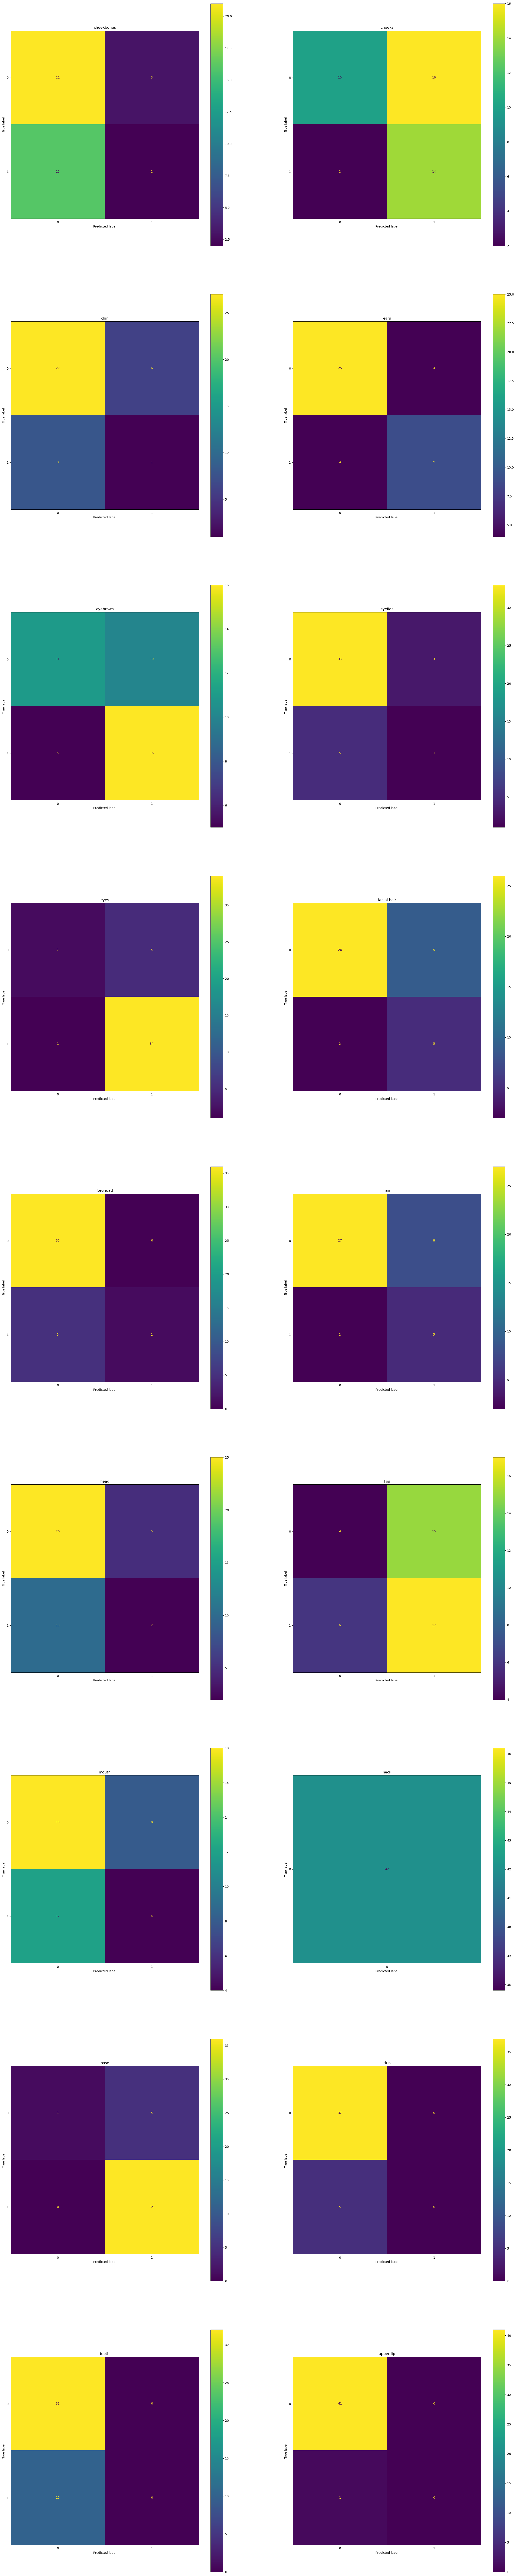

In [31]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

features = np.array([
    'cheekbones', 
    'cheeks', 
    'chin', 
    'ears', 
    'eyebrows', 
    'eyelids', 
    'eyes', 
    'facial hair', 
    'forehead', 
    'hair', 
    'head', 
    'lips', 
    'mouth', 
    'neck', 
    'nose', 
    'skin', 
    'teeth', 
    'upper lip'
])

fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(30, 150))

for index, (feature, ax) in enumerate(zip(features, axes.flatten())):
    cm = confusion_matrix(transposed_labels[index],
                         transposed_predictions[index])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    ax.title.set_text(feature)

plt.show()
